## Modules

In [7]:
import matplotlib.pyplot as plt
import os
import time
import datetime
import numpy as np
import Representacion_de_imagenes as repr_img
import pandas as pd
import seaborn as sns

from selenium import webdriver
from urllib.request import urlopen, Request, urlretrieve
from bs4 import BeautifulSoup
from PIL import Image
from skimage import io
from skimage.transform import resize
from sklearn.cluster import KMeans



In [6]:
!pip install beautifulsoup4

You should consider upgrading via the 'c:\users\camil\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Funtions

In [8]:
def create_dir(dir_, path_):
    
    parent_dir = path_
    path = os.path.join(parent_dir, dir_)
    try:
        os.mkdir(path)
    except Exception as e:
        print('Error: ', e)


def calculate_time_e(start):
    end_time = time.time()
    return end_time - start


def get_group(df, label):
    group = df[df['labels'] == label]['images'] 
    fig, axes = plt.subplots(5, len(group)//5,  figsize=(15, 15))
    c = 0
    for i in range(5):
        for j in range(len(group)//5):
            axes[i][j].imshow(group[group.index[c]])
            c+=1
    plt.show()
    
def show_img(images):
    fig, axes = plt.subplots(5, len(images)//5,  figsize=(20, 20))
    c = 0
    for i in range(5):
        for j in range(len(images)//5):
            axes[i][j].imshow(images[c])
            c+=1

# Scrapping Images from Google with a Chrome's drive

In [12]:
def get_image_driver(word, number):
    
    start_time = time.time()
    
    options = webdriver.ChromeOptions()
    options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe"
    driver = webdriver.Chrome('chromedriver.exe', chrome_options=options)
    
    ## The driver open Chrome 
    url="http://images.google.com/search?q="+word+"&tbm=isch&sout=1"
    
    driver.get(url) 
    pages = 0    
    date = str(datetime.datetime.now()).replace(' ', '_')[:-7].replace(':', '-')
    
    dir_ = word+'_'+date
    create_dir(dir_, 'Images')
    
    for i in range(number):
        try:
            # Taking Xpath of the images we want to extract
            imageXpathSelector = '//*[@id="islrg"]/div[1]/div['+str(i+1)+']/a[1]/div[1]/img' 
            img=driver.find_element_by_xpath(imageXpathSelector)
            
            # Getting url of the image
            src=(img.get_attribute('src'))
#             print(src)
            
            
            # Downloading images
            urlretrieve(src, "Images\{}\{}_{}.jpg".format(dir_, word, i))
            
        except Exception as e:
            pages+=1
            pass
    driver.close()
    print("It has been download it {} pages as a result of the word: {}".format(number-pages, word))
    print("It has last {} seconds".format(calculate_time_e(start_time)))
    return dir_, number


In [ ]:
dir_d_ = get_image_driver('Data Science covid', 50)

In [5]:
# print(dir_d_)

## Scrapping Images from Google with Beautiful soup (Takes some time)

In [6]:
def get_image_beauti_soup(word):

    start_time = time.time()
    url="http://images.google.com/search?q={}&tbm=isch&sout=1".format(word).replace(' ', '')
    pages = 0
    
    request = get_request(url)
    html = urlopen(request)
    # html = urlopen(url)

    date = str(datetime.datetime.now()).replace(' ', '_')[:-7].replace(':', '-')
    
    dir_ = word+'_'+date
    create_dir(dir_, 'Img')
  
    html_bs = BeautifulSoup(html.read(),"html5lib")
    links = obtain_links(html_bs)
    
    # print(html_bs.prettify())
    
    for i in range(len(links)):
        try:
            urlretrieve(links[i], "Img\{}\{}_{}.jpg".format(dir_, word,i+1))
            pages+=1
        except:
            pass
        
    print("It has been download it {} pages as a result of the word: {}".format(pages, word))
    print("It has last {} seconds".format(calculate_time_e(start_time)))
    return dir_, len(links)
    
def obtain_links(html_bs):
    links = []
    for script in html_bs.find_all('script'):
        text = script.string
        try:
            if(text.startswith('_setImgSrc')):
                links.append(text)
        except:
            pass
    links = [i.split('\'')[3] for i in links]
    
    return links
    

def get_request(url):
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
           'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
           'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
           'Accept-Encoding': 'none',
           'Accept-Language': 'en-US,en;q=0.8',
           'Connection': 'keep-alive'}
    request = Request(url, headers=headers)
    return request
    

In [28]:
dir_d_ = get_image_beauti_soup('Data science covid')

It has been download it 14 pages as a result of the word: Data science covid
It has last 13.259719371795654 seconds


## Get Images Loaded to a list

In [8]:
def list_images(word, amount, scrapper):
    
    dir_, pages = get_image_driver(word, amount) if(scrapper == 1) \
                    else get_image_beauti_soup(word)

    images = list()
    
    fig, axes = plt.subplots(1, 5,  figsize=(20, 20))

    c = 0
    for i in range(pages):
        try:
            path = 'Images\{}\{}_{}.jpg'.format(dir_, word, i) \
                    if(scrapper == 1) else \
                    'Img\{}\{}_{}.jpg'.format(dir_, word, i)
            im = io.imread(path)
            images.append(resize(im, (256, 256, 3)))
            if(c < 5): 
                axes[c].imshow(resize(im, (256, 256, 3)))
                c+=1
        except:
            pass
    plt.show()
    
    return images

## Choose the scrapper you prefer

* 1 >> Chrome Dirver
* 2 >> BeautifulSoup

It has been download it 20 pages as a result of the word: spiderman 1080x1080
It has last 8.807472944259644 seconds


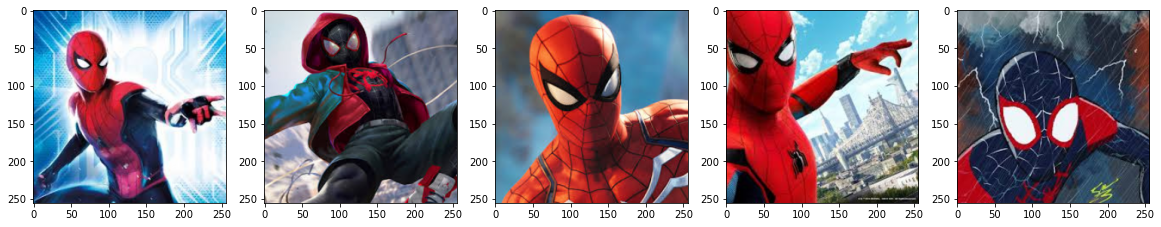

In [9]:
images = list_images('spiderman 1080x1080', 20, 1)

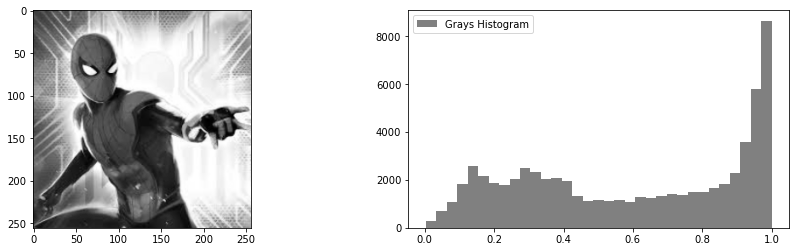

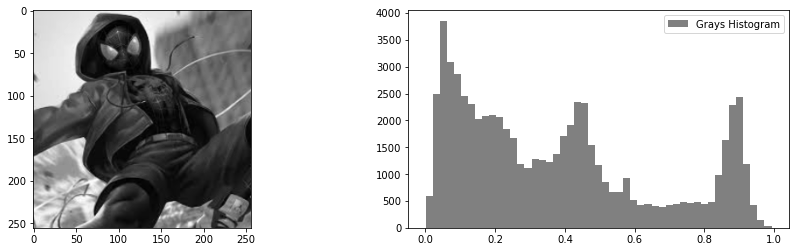

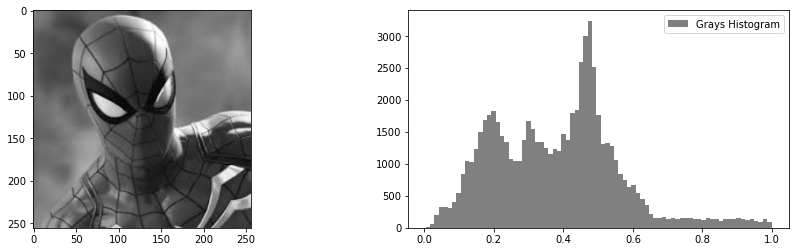

In [10]:
for i in images[:3]:
    repr_img.plot_img_gray(i)

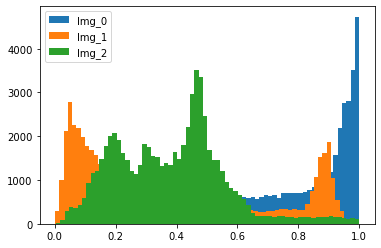

In [11]:
for i in range(3):
    plt.hist(repr_img.convert_to_gray(images[i]).ravel(), bins=70)

plt.legend([f"Img_{i}" for i in range(3)])
plt.show()

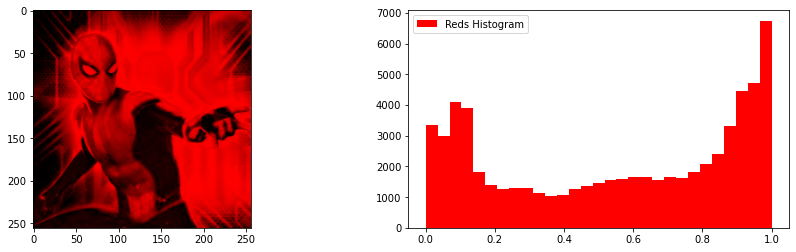

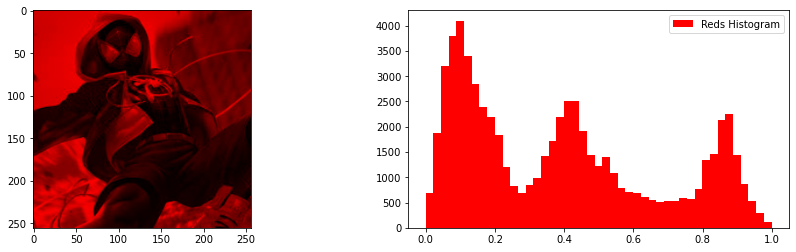

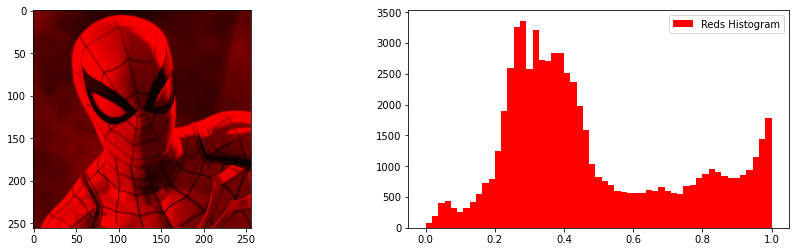

In [12]:
for i in images[:3]:
    repr_img.plot_img_r(i)

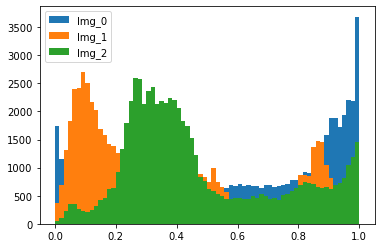

In [13]:
for i in range(3):
    plt.hist(images[i][:,:,0].ravel(), bins=70)

plt.legend([f"Img_{i}" for i in range(3)])
plt.show()

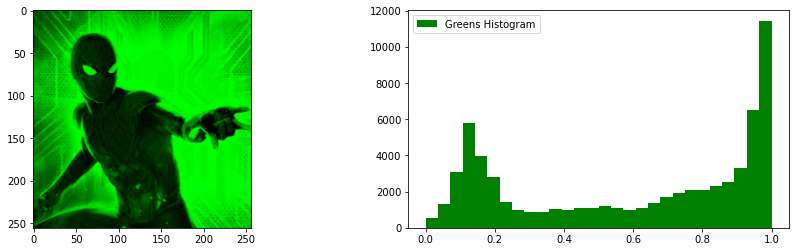

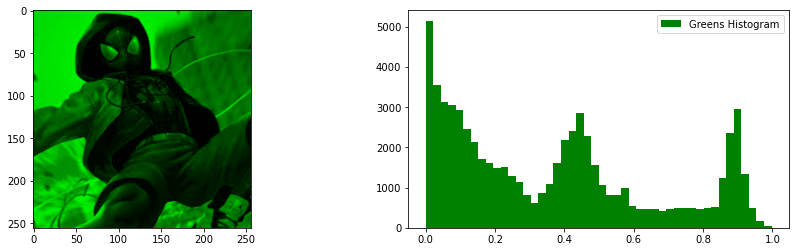

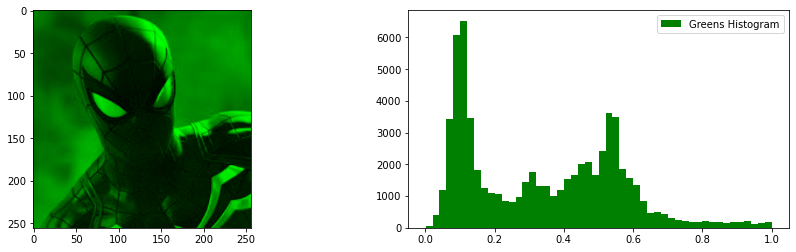

In [14]:
for i in images[:3]:
    repr_img.plot_img_g(i)

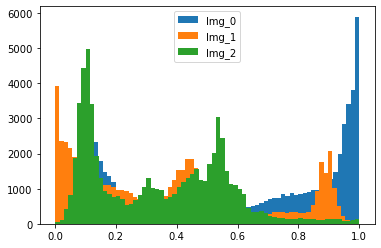

In [15]:
for i in range(3):
    plt.hist(images[i][:,:,1].ravel(), bins=70)

plt.legend([f"Img_{i}" for i in range(3)])
plt.show()

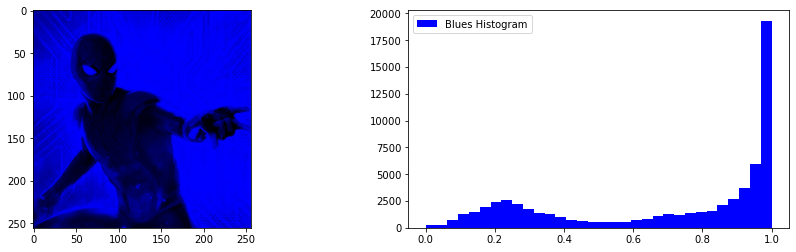

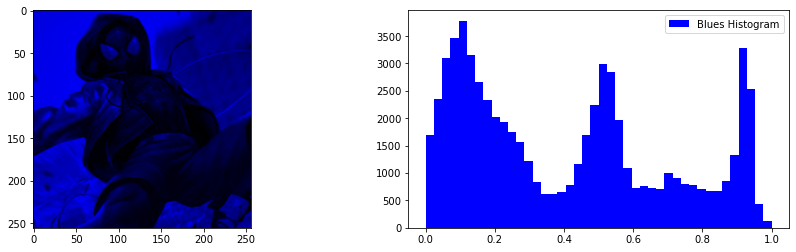

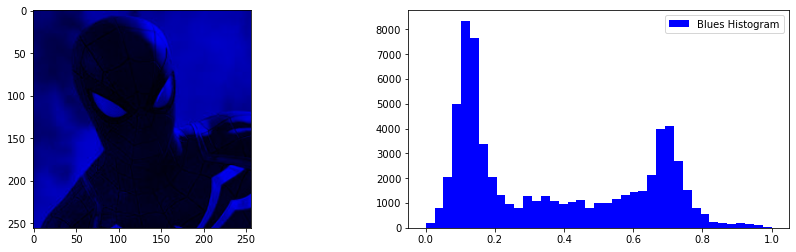

In [16]:
for i in images[:3]:
    repr_img.plot_img_b(i)

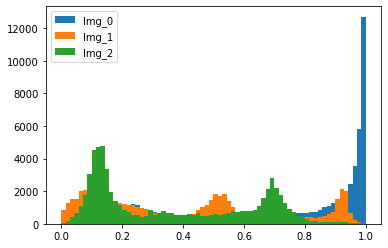

In [17]:
for i in range(3):
    plt.hist(images[i][:,:,2].ravel(), bins=70)

plt.legend([f"Img_{i}" for i in range(3)])
plt.show()

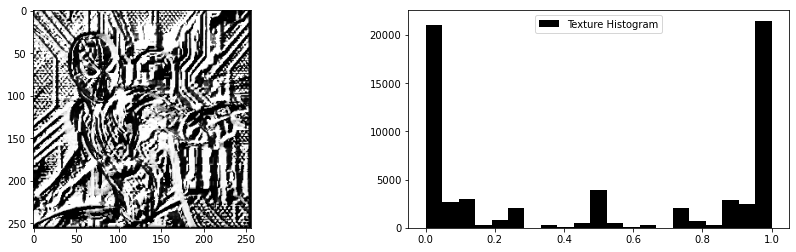

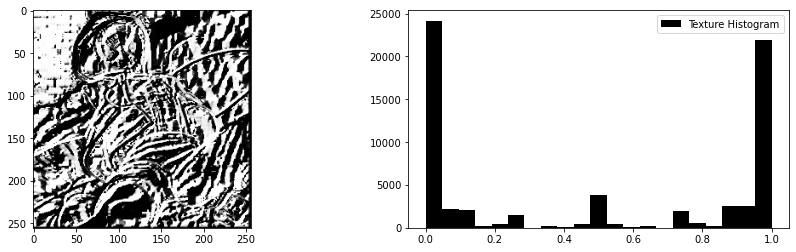

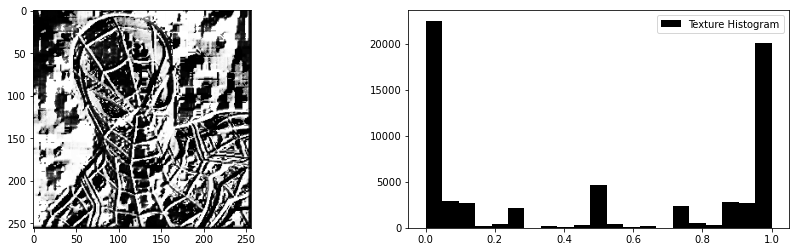

In [18]:
for i in images[:3]:
    repr_img.plot_texture(i)

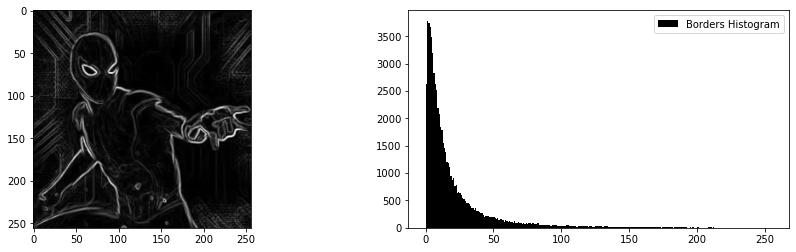

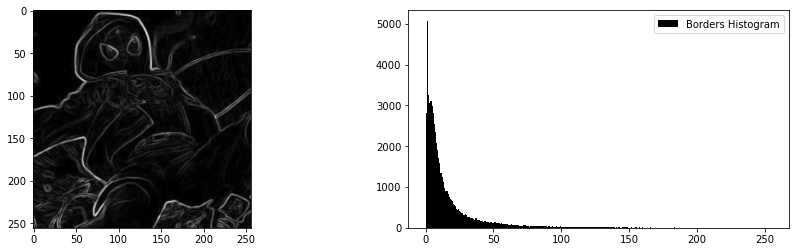

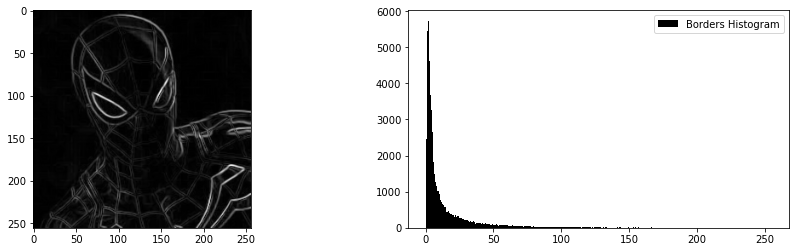

In [19]:
for i in images[:3]:
    repr_img.plot_borders(i)

## Training a clustering model with kmeans

It has been download it 20 pages as a result of the word: Fotos de gatos
It has last 10.1812744140625 seconds


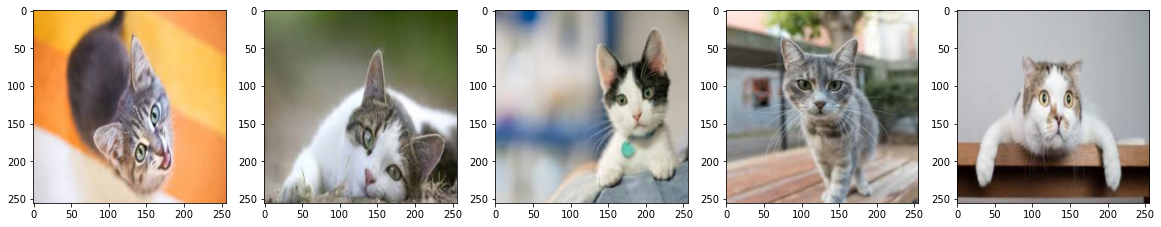

It has been download it 20 pages as a result of the word: Fotos de perros
It has last 9.750138998031616 seconds


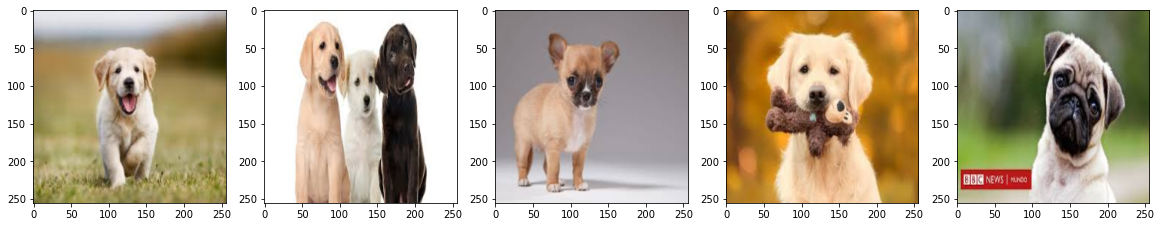

It has been download it 20 pages as a result of the word: Fotos de ratones
It has last 11.140676975250244 seconds


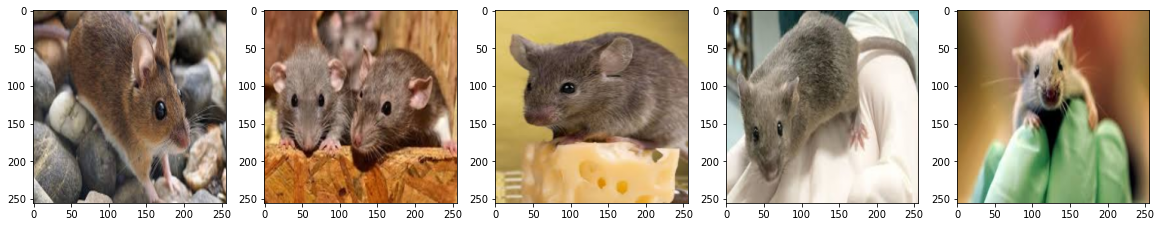

In [20]:
gatos = list_images('Fotos de gatos', 200, 1)
perros = list_images('Fotos de perros', 200, 1)
ratones = list_images('Fotos de ratones', 200, 1)

In [21]:
gatos_g = [repr_img.convert_to_gray(i).flatten().tolist() for i in gatos]
perros_g = [repr_img.convert_to_gray(i).flatten().tolist() for i in perros]
ratones_g = [repr_img.convert_to_gray(i).flatten().tolist() for i in ratones]

In [22]:
X_g = gatos_g + perros_g + ratones_g
animals = gatos + perros + ratones

# Creating dataframe
df_animals_g = pd.DataFrame({'images': animals, 'hist':X_g})

In [23]:
# Kmeans
cluster = 3
kmeans_g = KMeans(n_clusters=cluster).fit(X_g)
df_animals_g['labels'] = kmeans_g.labels_

# Number of images of each group
print("Group 1: {}".format(df_animals_g[df_animals_g['labels'] == 0].shape))
print("Group 2: {}".format(df_animals_g[df_animals_g['labels'] == 1].shape))
print("Group 3: {}".format(df_animals_g[df_animals_g['labels'] == 2].shape))

Group 1: (14, 3)
Group 2: (17, 3)
Group 3: (29, 3)


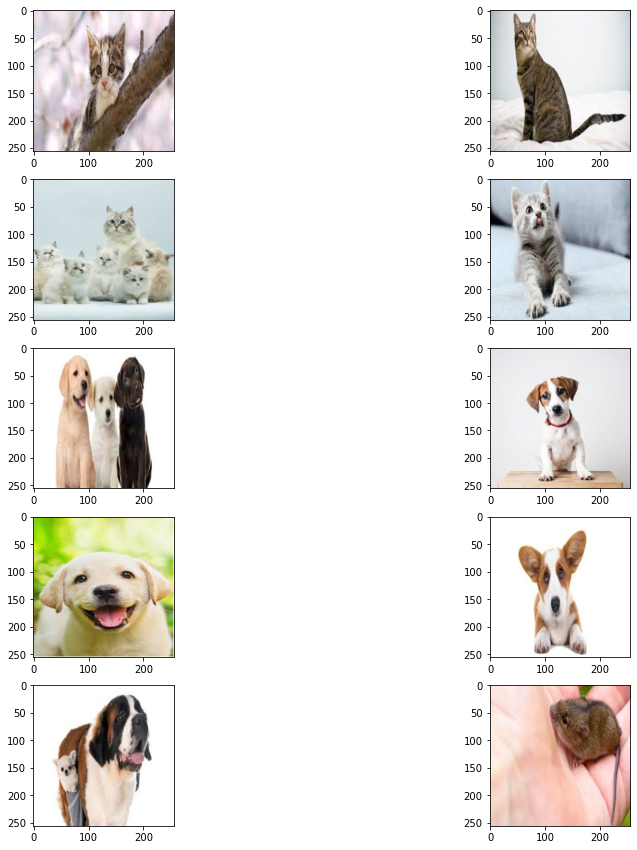

In [24]:
get_group(df_animals_g, 0)

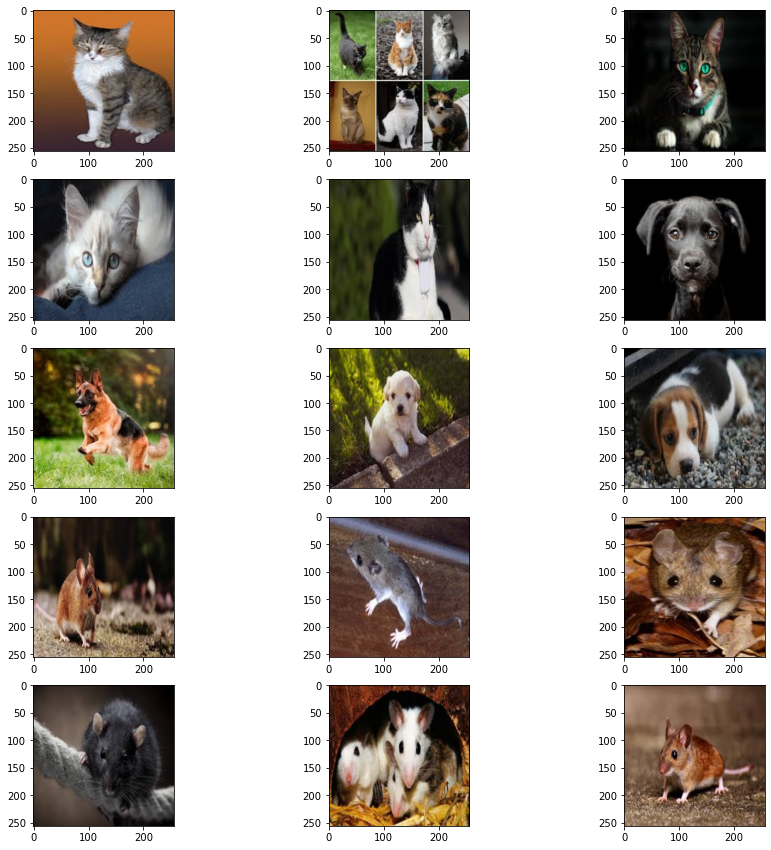

In [25]:
get_group(df_animals_g, 1)

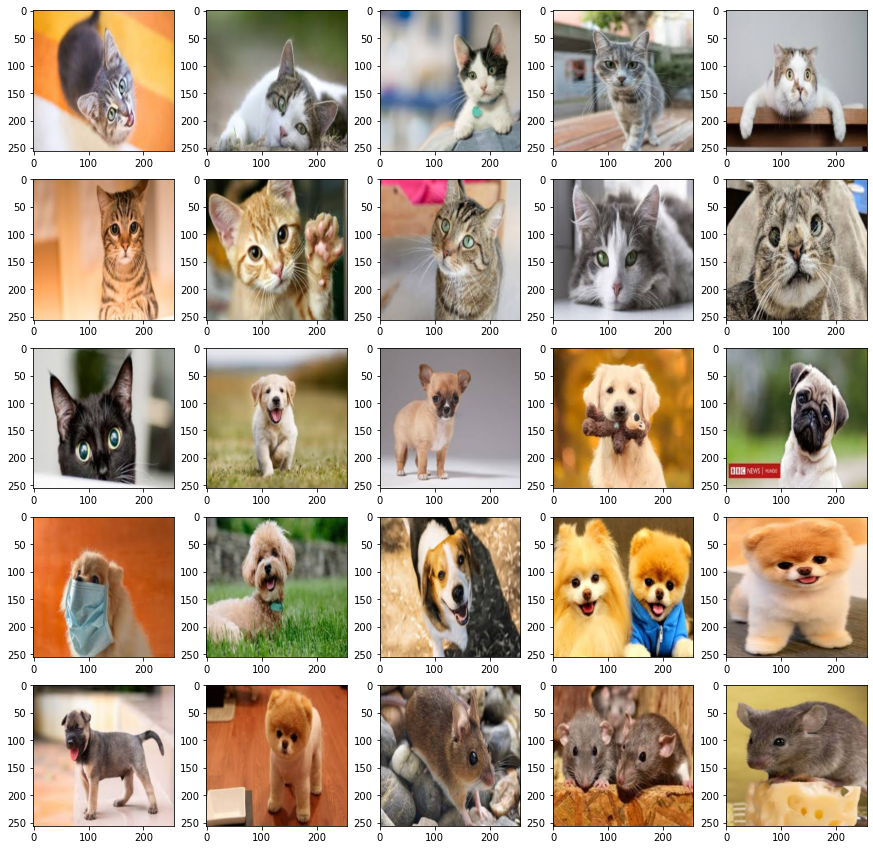

In [26]:
get_group(df_animals_g, 2)